# Nettoyage, Imputation et Analyse Complète du Dataset METABRIC
Ce notebook contient toutes les étapes :
- Importation du dataset
- Inspection initiale
- Nettoyage profond
- Imputation
- Standardisation
- Analyse exploratoire
- Clustering ou Modélisation supervisée
- Export du dataset nettoyé


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

df = pd.read_csv("METABRIC_RNA_Mutation.csv", low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [40]:
df.describe(include='all')

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1904.000000,1904.000000,1882,1904,1889,1850,1904.000000,1904,1904.000000,1874,...,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904
unique,NaN,NaN,2,2,6,3,NaN,7,NaN,2,...,5,5,5,4,4,3,3,3,3,2
top,NaN,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NaN,LumA,NaN,Positve,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,1127,1903,1500,939,NaN,679,NaN,1445,...,1900,1900,1900,1901,1901,1902,1902,1902,1902,1903
mean,3921.982143,61.087054,NaN,NaN,NaN,NaN,0.207983,NaN,2.643908,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2358.478332,12.978711,NaN,NaN,NaN,NaN,0.405971,NaN,1.228615,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,21.930000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,896.500000,51.375000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4730.500000,61.770000,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5536.250000,70.592500,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
missing = df.isna().sum().sort_values(ascending=False)
missing.head(20)

tumor_stage                       501
3-gene_classifier_subtype         204
primary_tumor_laterality          106
neoplasm_histologic_grade          72
cellularity                        54
mutation_count                     45
er_status_measured_by_ihc          30
type_of_breast_surgery             22
tumor_size                         20
cancer_type_detailed               15
oncotree_code                      15
tumor_other_histologic_subtype     15
death_from_cancer                   1
ar                                  0
bche                                0
akr1c3                              0
akt3                                0
akr1c4                              0
akr1c2                              0
cdk8                                0
dtype: int64

In [14]:
df = df.drop_duplicates().reset_index(drop=True)
thresh = 0.1 * len(df)
df = df.dropna(axis=1, thresh=thresh)
df.shape

(1904, 693)

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_cols[:10], cat_cols[:10]

(['patient_id',
  'age_at_diagnosis',
  'chemotherapy',
  'cohort',
  'neoplasm_histologic_grade',
  'hormone_therapy',
  'lymph_nodes_examined_positive',
  'mutation_count',
  'nottingham_prognostic_index',
  'overall_survival_months'],
 ['type_of_breast_surgery',
  'cancer_type',
  'cancer_type_detailed',
  'cellularity',
  'pam50_+_claudin-low_subtype',
  'er_status_measured_by_ihc',
  'er_status',
  'her2_status_measured_by_snp6',
  'her2_status',
  'tumor_other_histologic_subtype'])

In [18]:
num_imp = SimpleImputer(strategy='median')
df[numeric_cols] = num_imp.fit_transform(df[numeric_cols])

for c in cat_cols:
    mode = df[c].mode(dropna=True)
    fill = mode.iloc[0] if len(mode) else 'Missing'
    df[c] = df[c].fillna(fill)

df.isna().sum().sum()

0

In [20]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.663366,1.122359,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,-0.512445,claudin-low,-1.338368,Positve,...,0,0,0,0,0,0,0,0,0,0
1,-1.662518,-1.379317,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,-0.512445,LumA,-1.338368,Positve,...,0,0,0,0,0,0,0,0,0,0
2,-1.661245,-0.941562,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1.951430,LumB,-1.338368,Positve,...,0,0,0,0,0,0,0,0,0,0
3,-1.660821,-1.033275,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1.951430,LumB,-1.338368,Positve,...,0,0,0,0,0,0,0,0,0,0
4,-1.659973,1.224091,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1.951430,LumB,-1.338368,Positve,...,0,0,0,0,0,0,0,0,0,0


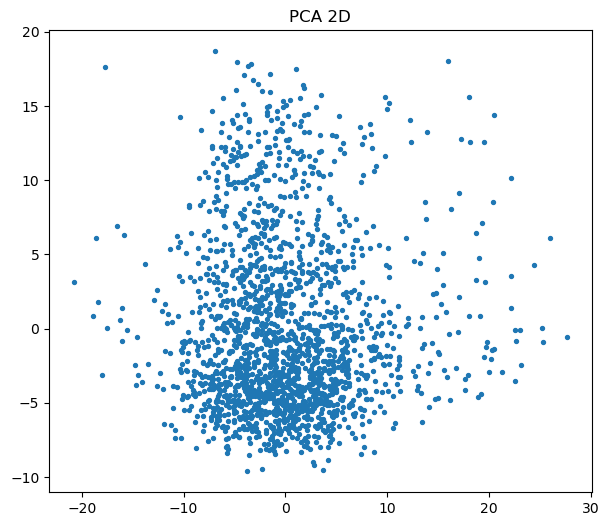

In [22]:
if len(numeric_cols) >= 2:
    pca = PCA(n_components=2)
    coords = pca.fit_transform(df[numeric_cols])
    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1], s=8)
    plt.title('PCA 2D')
    plt.show()
else:
    print('Pas assez de variables numériques pour PCA.')

In [24]:
binary_candidates = [c for c in df.columns if df[c].nunique() == 2]
binary_candidates

['type_of_breast_surgery',
 'cancer_type',
 'chemotherapy',
 'er_status_measured_by_ihc',
 'er_status',
 'her2_status',
 'hormone_therapy',
 'inferred_menopausal_state',
 'primary_tumor_laterality',
 'overall_survival',
 'pr_status',
 'radio_therapy',
 'siah1_mut']

In [26]:
target = None
if len(binary_candidates)>0:
    target = binary_candidates[0]
    print('Target supervisée détectée:', target)
else:
    print('Aucune variable cible binaire trouvée, passage au clustering.')

Target supervisée détectée: type_of_breast_surgery
